In [1]:
import sys
sys.path.append('..')
from Constants import Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn
import pyperclip
import os

import scipy.stats

import seaborn as sns

/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from statsmodels.stats.anova import anova_lm

import numpy as np
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
pathes = glob.glob(f"{Constants.path_to_matlab_repository_folder}/csv/*_*/HRV_and_PLI.csv")
pathes.sort()
pathes

['/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/HRV_and_PLI.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/HRV_and_PLI.csv',
 

In [5]:
# 使用するデータセットは一つなので，ここでまとめて作っちゃいましょう

for i,target_phase in enumerate(Constants.target_phases):
    
    for j,path in enumerate(pathes):

        df = pd.read_csv(path,index_col=0).fillna(0)
        # column
        # row
        df = df.loc[[target_phase]] # seriesとして取り出したいときはこっち
        if j == 0 and i == 0:
            print("flow_dataset初期化")
            dataset = df
        else:
            dataset = pd.concat([dataset, df], axis=0)
        
dataset

flow_dataset初期化


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,vlf,lf,hf,lf/hf,p_total,vlf_perc,lf_perc,hf_perc,lf_nu,hf_nu,lf_diff,hf_diff,lfhf_diff,kubios_lf,kubios_hf,kubios_lf/hf,FpZ,FC3,FC4,FCz,O1,O2,Fp2,mean_all,mean_3ch,concentration_FC3,concentration_FC4,concentration_FCz,concentration_mean,difficulty,fast,fulfillment,absorb,questionnaire_average
rest,74.087015,809.858521,41.250305,20.146486,36.787621,0.619355,0.183871,30.0,26.012686,52.268898,4271.480335,0.497670,0.300000,396.011131,338.306267,533.157937,0.634533,1267.475336,31.244090,26.691349,42.064561,38.820443,61.179557,0.000000,0.000000,0.000000,257.0,510.0,0.500,0.470375,0.718243,0.530592,0.783054,0.352428,0.286579,0.390179,0.504493,0.677296,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.00
rest,84.110828,713.344538,35.699439,17.214344,27.709366,0.432584,0.067416,22.0,19.593268,46.540635,2864.765352,0.420993,0.133333,267.138630,631.637193,212.740305,2.969053,1111.516129,24.033716,56.826633,19.139651,74.805072,25.194928,0.000000,0.000000,0.000000,591.0,219.0,2.700,0.422667,0.593262,0.690615,0.725889,0.310892,0.438972,0.430201,0.516071,0.669922,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.220071,797.659443,40.900640,13.923616,22.012701,0.304348,0.021739,20.0,15.564184,55.685590,2722.820846,0.279501,0.133333,316.777455,1231.720452,138.655648,8.883305,1687.153555,18.775852,73.005830,8.218318,89.881927,10.118073,0.000000,0.000000,0.000000,1044.0,133.0,7.863,0.367564,0.525578,0.305216,0.487435,0.320239,0.311307,0.395218,0.387508,0.439410,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,69.352315,865.147766,97.031908,17.478813,31.990300,0.593103,0.103448,68.0,22.620469,135.393695,9621.658211,0.167072,0.100000,6128.267686,3421.219463,63.168555,54.160166,9612.655704,63.752077,35.590783,0.657139,98.187098,1.812902,0.000000,0.000000,0.000000,3530.0,90.0,39.337,0.413260,0.519220,0.549392,0.696971,0.218319,0.247750,0.270101,0.416431,0.588528,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
rest,75.038981,799.584416,82.250228,34.261413,49.297373,0.567657,0.231023,47.0,34.849896,109.839201,12025.654369,0.317281,0.133333,4390.708426,2147.469055,1332.822690,1.611219,7871.000171,55.783361,27.283306,16.933333,61.703708,38.296292,0.000000,0.000000,0.000000,2373.0,2504.0,0.948,0.254564,0.437716,0.493796,0.484021,0.533929,0.538550,0.234585,0.425309,0.471844,0.000000,0.000000,0.000000,0.000000,\t\t\t\t,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
overload,67.646856,886.959184,29.955835,14.390555,26.989317,0.511945,0.030717,19.0,19.084313,37.894766,2271.985957,0.503613,0.133333,344.861204,128.672143,182.674378,0.704380,656.207725,52.553664,19.608447,27.837889,41.327631,58.672369,360.961401,268.838068,0.380050,149.0,191.0,0.777,0.142077,0.179835,0.204738,0.273960,0.126628,0.120716,0.227956,0.203727,0.219511,0.278569,0.065311,0.379934,0.241271,1,5.0,3.0,6.0,3.75
overload,70.102050,855.895082,48.317686,23.119517,42.546724,0.690789,0.240132,28.0,30.084852,61.443674,5807.308933,0.489633,0.100000,1638.321753,879.841437,283.156567,3.107261,2801.319758,58.483925,31.408105,10.107970,75.652876,24.347124,-611.399493,819.093326,-2.863721,332.0,335.0,0.991,0.299530,0.209866,0.267556,0.467623,0.137759,0.108795,0.209677,0.222667,0.315015,0.238469,0.171739,0.151192,0.187133,1,3.0,2.0,2.0,2.00
overload,82.540663,726.914439,28.300302,12.540479,22.821372,0.396783,0.010724,18.0,16.137059,36.598566,1855.403358,0.440921,0.400000,147.616790,89.182101,84.430741,1.056275,321.229633,45.953665,27.762725,26.283609,51.368378,48.631622,373.516383,796.523525,-0.531051,110.0,111.0,0.984,0.308515,0.377024,0.444892,0.463934,0.387670,0.360314,0.291493,0.271253,0.428617,0.084935,0.058418,0.119103,0.087485,1,3.0,2.0,3.0,2.25
overload,71.403043,840.300319,42.098309,18.469189,33.254265,0.57

In [6]:
mkdir_path = f"{Constants.path_to_matlab_repository_folder}/csv/analysis_results/{Constants.folder_name}"

os.system("mkdir " + mkdir_path)
os.system("mkdir " + mkdir_path + "/ANOVA")

mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240627_kyoto: File exists
mkdir: /Users/miyakooti/repositories/arai_MATLAB_program/csv/analysis_results/20240627_kyoto/ANOVA: File exists


256

In [7]:
target_columns = Constants.target_columns
skip_columns = ["lf_diff", "hf_diff", "lfhf_diff", "concentration_FC3", "concentration_FC4", "concentration_FCz", "concentration_mean", "difficulty", "fast", "fulfillment", "absorb", "questionnaire_average"]

bpm
            df        sum_sq     mean_sq         F    PR(>F)
state      2.0     31.283576   15.641788  0.027538  0.972854
Residual  45.0  25560.362880  568.008064       NaN       NaN
ibi
            df         sum_sq       mean_sq         F    PR(>F)
state      2.0    7622.127401   3811.063700  0.198544  0.820638
Residual  45.0  863776.511787  19195.033595       NaN       NaN
lf
            df        sum_sq        mean_sq         F    PR(>F)
state      2.0  6.015818e+05  300790.894589  2.808266  0.070909
Residual  45.0  4.819910e+06  107109.113491       NaN       NaN
hf
            df        sum_sq       mean_sq         F    PR(>F)
state      2.0  6.859234e+05  342961.68873  1.628017  0.207668
Residual  45.0  9.479798e+06  210662.17777       NaN       NaN
lf/hf
kubios_lf
            df        sum_sq        mean_sq         F    PR(>F)
state      2.0  8.163791e+05  408189.562500  3.358845  0.043692
Residual  45.0  5.468704e+06  121526.759722       NaN       NaN
kubios_hf
            

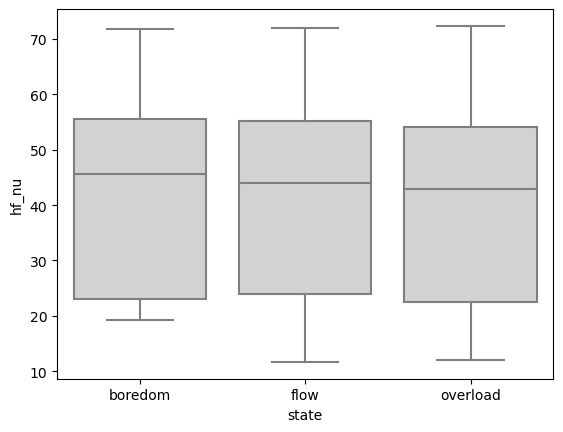

In [37]:

for target in target_columns:
    print(target)
    
    # スラッシュ変な挙動起こす
    if target == "lf/hf":
        continue
        
    if target == "kubios_lf/hf":
        continue        
    if target == "sd1/sd2":
        continue
    
    rest = dataset[[target]].loc["rest"]
    rest.reset_index(drop=True, inplace=True)

    boredom = dataset[[target]].loc["boredom"]
    boredom.reset_index(drop=True, inplace=True)

    flow = dataset[[target]].loc["flow"]
    flow.reset_index(drop=True, inplace=True)

    ultra = dataset[[target]].loc["ultra"]
    ultra.reset_index(drop=True, inplace=True)

    overload = dataset[[target]].loc["overload"]
    overload.reset_index(drop=True, inplace=True)
    
#     if target in skip_columns:
#         # restで計算されない指標である場合
#         combined_data = pd.concat([
#             boredom.assign(state='boredom'),
#             flow.assign(state='flow'),
#             ultra.assign(state='ultra'),
#             overload.assign(state='overload')
#         ])
        
#     else:
#         combined_data = pd.concat([
#             rest.assign(state='rest'),
#             boredom.assign(state='boredom'),
#             flow.assign(state='flow'),
# #             ultra.assign(state='ultra'),
#             overload.assign(state='overload')
#         ])
        
    combined_data = pd.concat([
        boredom.assign(state='boredom'),
        flow.assign(state='flow'),
#         ultra.assign(state='ultra'),
        overload.assign(state='overload')
    ])
    
    colors = {'boredom': 'lightgray', 'flow': 'lightgray', 'overload': 'lightgray'}

    
    plt.clf()
    boxplot = sns.boxplot(x="state", y=f"{target}", data=combined_data, palette=colors)
    boxplot
    
    figure = boxplot.get_figure()
    if target == "lf/hf":
        figure.savefig(mkdir_path+f"/ANOVA/lf_hf.png")
    else:
        figure.savefig(mkdir_path+f"/ANOVA/{target}.png")
        
        # 一次元配置の分散分析モデルを作成
    model = ols(f'{target} ~ state', data=combined_data).fit()

    # 分散分析結果を取得
    anova_result = anova_lm(model)

    # 結果を表示
    print(anova_result)
    
    # 事後検定の実施
    tukey = pairwise_tukeyhsd(endog=combined_data[target], groups=combined_data['state'], alpha=0.10)
    tukey.summary()

    
    # Save the string to a text file
    file_path = mkdir_path+f"/ANOVA/{target}.txt"
    with open(file_path, 'w') as file:
        file.write(tukey.summary().as_text())

<AxesSubplot:xlabel='state', ylabel='hf_nu'>

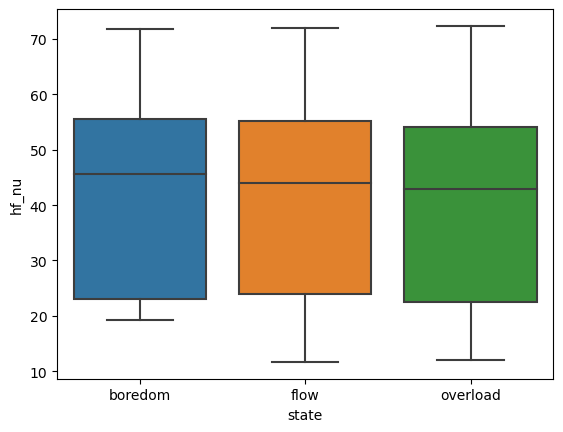

In [29]:
plt.clf()
boxplot = sns.boxplot(x="state", y=f"{target}", data=combined_data)
boxplot